<a href="https://colab.research.google.com/github/Danalmestadi/T5-WeekFive/blob/main/Exponential_smoothing_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Exponential smoothing**



##  install these libraries using pip:



In [1]:
!pip install pandas matplotlib

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import Holt


## Loading dataset

In [13]:
data = pd.read_csv('traffic.csv', parse_dates=['DateTime'], index_col='DateTime')
print(data.head())


                     Junction  Vehicles           ID
DateTime                                            
2015-11-01 00:00:00         1        15  20151101001
2015-11-01 01:00:00         1        13  20151101011
2015-11-01 02:00:00         1        10  20151101021
2015-11-01 03:00:00         1         7  20151101031
2015-11-01 04:00:00         1         9  20151101041


In [14]:
data=data.drop('ID', axis=1)
print(data.head())

                     Junction  Vehicles
DateTime                               
2015-11-01 00:00:00         1        15
2015-11-01 01:00:00         1        13
2015-11-01 02:00:00         1        10
2015-11-01 03:00:00         1         7
2015-11-01 04:00:00         1         9


In [15]:
data=data.drop('Junction', axis=1)
print(data.head())

                     Vehicles
DateTime                     
2015-11-01 00:00:00        15
2015-11-01 01:00:00        13
2015-11-01 02:00:00        10
2015-11-01 03:00:00         7
2015-11-01 04:00:00         9


In [18]:
data=data.iloc[:500]

## Visualizing the data





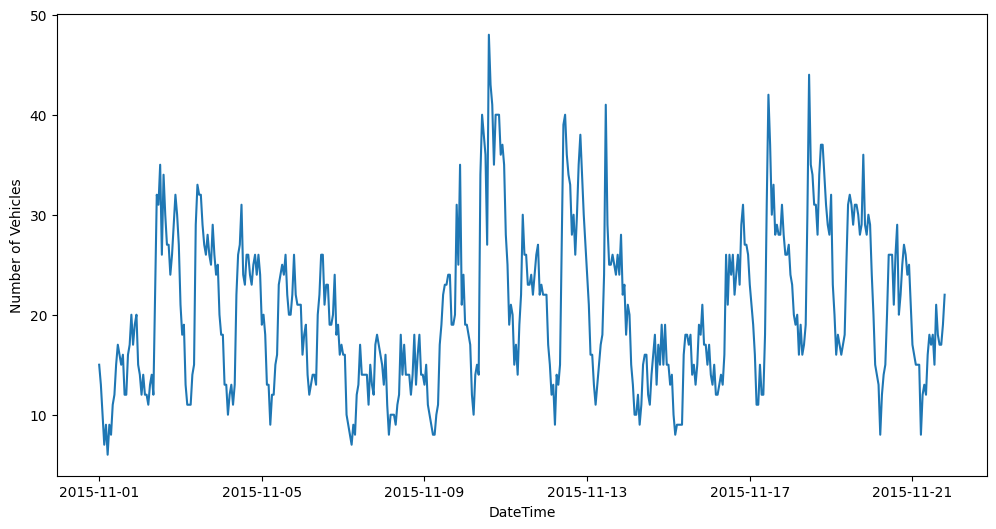

In [19]:
plt.figure(figsize=(12, 6))
plt.plot(data)
plt.xlabel('DateTime')
plt.ylabel('Number of Vehicles')
plt.show()


#**Single Exponential smoothing**





In [21]:
model = SimpleExpSmoothing(data)
model_single_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions





In [22]:
forecast_single = model_single_fit.forecast(6)
print(forecast_single)

2015-11-21 20:00:00    21.873341
2015-11-21 21:00:00    21.873341
2015-11-21 22:00:00    21.873341
2015-11-21 23:00:00    21.873341
2015-11-22 00:00:00    21.873341
2015-11-22 01:00:00    21.873341
Freq: H, dtype: float64


## Visualize Single Exponential Smoothing




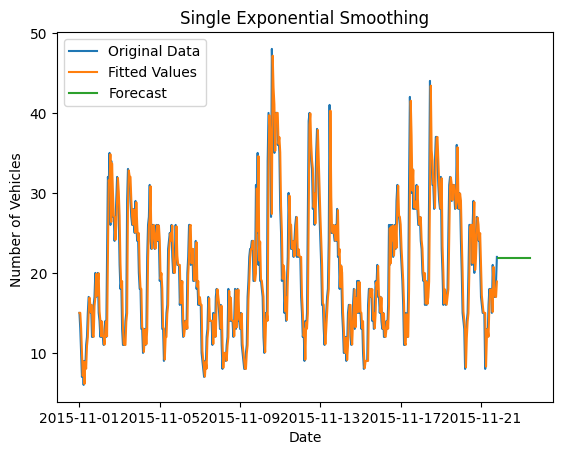

In [24]:
forecast_single = model_single_fit.forecast(40)
plt.plot(data, label='Original Data')
plt.plot(model_single_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_single, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles ')
plt.title('Single Exponential Smoothing')
plt.legend()
plt.show()

#**Double Exponential Smoothing**




In [26]:
model_double = Holt(data)
model_double_fit = model_double.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [28]:
forecast_double = model_double_fit.forecast(6)
print(forecast_double)

2015-11-21 20:00:00    21.927524
2015-11-21 21:00:00    21.938688
2015-11-21 22:00:00    21.949853
2015-11-21 23:00:00    21.961018
2015-11-22 00:00:00    21.972183
2015-11-22 01:00:00    21.983348
Freq: H, dtype: float64


## Visualize Double Exponential Smoothing




In [29]:
forecast_double = model_double_fit.forecast(40)


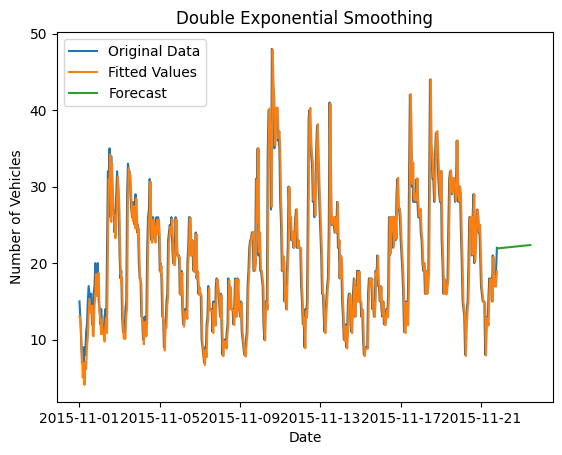

In [35]:
plt.plot(data, label='Original Data')
plt.plot(model_double_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_double, label='Forecast')
plt.xlabel('Date')
plt.ylabel('Number of Vehicles')
plt.title('Double Exponential Smoothing')
plt.legend()
plt.show()


#**Holt-Winter’s Seasonal Smoothing**






In [31]:
from statsmodels.tsa.api import ExponentialSmoothing

# Create an instance of ExponentialSmoothing class
model_triple = ExponentialSmoothing(
    data, seasonal_periods=12, trend='add', seasonal='add')

# Fit the model to the data
model_triple_fit = model_triple.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


## Making predictions



In [32]:
forecast_triple = model_triple_fit.forecast(6)
print(forecast_triple)


2015-11-21 20:00:00    21.899819
2015-11-21 21:00:00    24.411694
2015-11-21 22:00:00    27.021475
2015-11-21 23:00:00    27.021718
2015-11-22 00:00:00    25.460868
2015-11-22 01:00:00    23.080138
Freq: H, dtype: float64


## Visualize Triple Exponential Smoothing




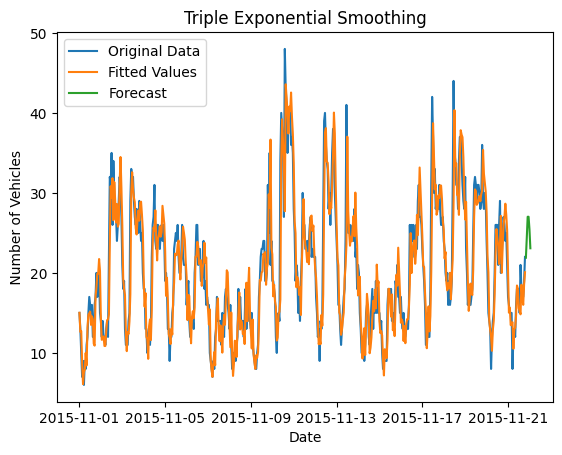

In [34]:
plt.plot(data, label='Original Data')
plt.plot(model_triple_fit.fittedvalues, label='Fitted Values')
plt.plot(forecast_triple, label='Forecast')
plt.xlabel('Date')
plt.ylabel(' Number of Vehicles ')
plt.title('Triple Exponential Smoothing')
plt.legend()
plt.show()

##**Well done :)**